## Clustering of Patients

In [12]:
import json
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams
from tqdm import tqdm
from collections import Counter

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

plt.style.use('seaborn')
rcParams.update({'figure.autolayout': True})

%matplotlib inline

### Get Data

In [2]:
df = pd.read_csv("Data\\raw_data.csv")

unwanted_columns = [
    'Patient Number',
    'State Patient Number',
    'Estimated Onset Date',
    'Detected City',
    'State code',
    'Notes',
    'Contracted from which Patient (Suspected)',
    'Source_1',
    'Source_2',
    'Source_3',
    'Backup Notes',
]

df.drop(unwanted_columns, axis=1, inplace=True)

df['Date Announced'] = pd.to_datetime(df['Date Announced'], infer_datetime_format=True)
df['Status Change Date'] = pd.to_datetime(df['Status Change Date'], infer_datetime_format=True)
df['Age Bracket'] = pd.to_numeric(df['Age Bracket'], errors='coerce')

df['Days Affected'] = df['Status Change Date'] - df['Date Announced']
df['Days Affected'] = df['Days Affected'].map(lambda x: x.days)
df.drop(['Status Change Date', 'Date Announced'], inplace=True, axis=1)
df.replace('Imported ', 'Imported', inplace=True)

nan_dict = {
    'Age Bracket': -1,
    'Gender': 'Not Available',
    'Detected District': 'Not Available',
    'Detected State': 'Not Available',
    'Current Status': 'Not Available',
    'Nationality': 'Not Available',
    'Type of transmission': 'Not Available',
    'Days Affected': -1
}

df.fillna(nan_dict, inplace=True)
df.head()

,Age Bracket,Gender,Detected District,Detected State,Current Status,Nationality,Type of transmission,Days Affected
0,20.0,F,Thrissur,Kerala,Recovered,India,Imported,15.0
1,-1.0,Not Available,Alappuzha,Kerala,Recovered,India,Imported,12.0
2,-1.0,Not Available,Kasaragod,Kerala,Recovered,India,Imported,11.0
3,45.0,M,East Delhi,Delhi,Recovered,India,Imported,13.0
4,24.0,M,Hyderabad,Telangana,Recovered,India,Imported,0.0


### Scale data

In [3]:
scaler = StandardScaler()

scale_cols = [
    'Age Bracket',
    'Days Affected',
]

df[scale_cols] = scaler.fit_transform(df[scale_cols])
df.head()

,Age Bracket,Gender,Detected District,Detected State,Current Status,Nationality,Type of transmission,Days Affected
0,1.468770,F,Thrissur,Kerala,Recovered,India,Imported,13.675621
1,-0.275400,Not Available,Alappuzha,Kerala,Recovered,India,Imported,10.927722
2,-0.275400,Not Available,Kasaragod,Kerala,Recovered,India,Imported,10.011755
3,3.545163,M,East Delhi,Delhi,Recovered,India,Imported,11.843688
4,1.800993,M,Hyderabad,Telangana,Recovered,India,Imported,-0.063876


### Encode Data

In [4]:
encode_cols = [
    'Gender',
    'Detected District',
    'Detected State',
    'Current Status',
    'Nationality',
    'Type of transmission',
]

le_dict = {col: LabelEncoder() for col in encode_cols}
for col in encode_cols:
    df[col] = le_dict[col].fit_transform(df[col])

df.head()

,Age Bracket,Gender,Detected District,Detected State,Current Status,Nationality,Type of transmission,Days Affected
0,1.468770,0,410,15,3,1,0,13.675621
1,-0.275400,2,8,15,3,1,0,10.927722
2,-0.275400,2,207,15,3,1,0,10.011755
3,3.545163,1,110,7,3,1,0,11.843688
4,1.800993,1,157,28,3,1,0,-0.063876


### Work with data

In [23]:
data = df.values

kmeans = KMeans(n_clusters=2, n_jobs=-1)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

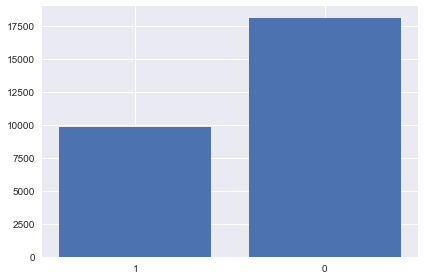

In [24]:
labels = kmeans.labels_
counter = Counter(labels)

plt.bar(counter.keys(), counter.values())
plt.xticks(range(len(counter.keys())), counter.keys())
plt.show()

In [38]:
for i in range(len(labels)):
    if labels[i] == 0:
        print('Label: 0')
        for col in encode_cols:
            print(le_dict[col].inverse_transform(df[col])[i])
        break


Label: 0
Not Available
Alappuzha
Kerala
Recovered
India
Imported
